<a href="https://colab.research.google.com/github/Vedarham/XLearnings01/blob/main/Placement_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilislam007/college-student-placement-factors-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'college-student-placement-factors-dataset' dataset.
Path to dataset files: /kaggle/input/college-student-placement-factors-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df = pd.read_csv('/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv')

In [ ]:
df

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No
...,...,...,...,...,...,...,...,...,...,...
9995,CLG0021,119,8.41,8.29,4,No,1,8,0,Yes
9996,CLG0098,70,9.25,9.34,7,No,0,7,2,No
9997,CLG0066,89,6.08,6.25,3,Yes,3,9,5,No
9998,CLG0045,107,8.77,8.92,3,No,7,5,1,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [ ]:
df = df.iloc[:121,[1,3,9]]

In [ ]:
import matplotlib.pyplot as plt

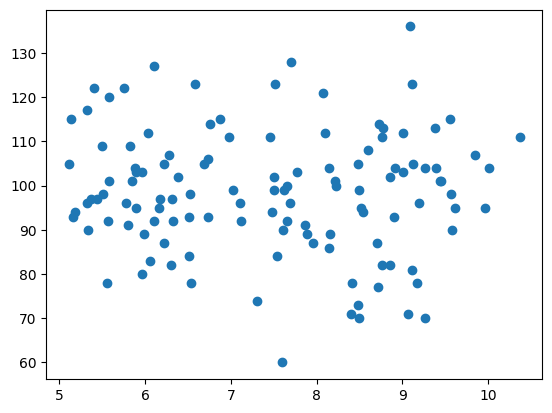

In [ ]:
plt.scatter(df['CGPA'],df['IQ'])

In [ ]:
df['Placement'] = df['Placement'].map({'Yes': 1, 'No': 0})

In [ ]:
df

,IQ,CGPA,Placement
0,107,6.28,0
1,97,5.37,0
2,109,5.83,0
3,122,5.75,0
4,96,7.69,0
...,...,...,...
116,99,7.50,0
117,82,8.76,0
118,117,5.32,0
119,111,10.37,0


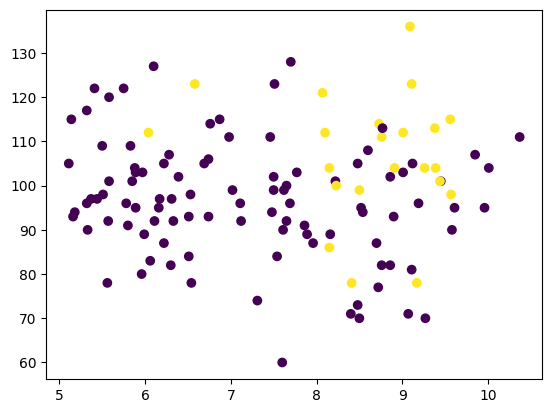

In [ ]:
plt.scatter(df['CGPA'],df['IQ'], c= df['Placement'])

In [ ]:
X = df.iloc[:,0:2]
X

,IQ,CGPA
0,107,6.28
1,97,5.37
2,109,5.83
3,122,5.75
4,96,7.69
...,...,...
116,99,7.50
117,82,8.76
118,117,5.32
119,111,10.37


In [ ]:
Y = df.iloc[:,-1]
Y

,Placement
0,0
1,0
2,0
3,0
4,0
...,...
116,0
117,0
118,0
119,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
X_test

array([[ 0.94063049, -0.00900032],
       [ 0.43535176,  1.811891  ],
       [ 0.79626513, -1.17294262],
       [ 0.50753443, -0.55883809],
       [ 0.94063049,  0.91929722],
       [ 0.00225571, -1.40144662],
       [-0.06992697, -0.8301866 ],
       [ 0.21880373, -1.15866112],
       [-1.15266709,  0.99070472],
       [-0.28647499, -1.63709138],
       [ 0.21880373,  1.40486823],
       [ 1.73463991, -1.23006862],
       [ 1.59027456, -1.35146137],
       [-0.86393639,  0.48371145],
       [ 0.50753443,  0.71935621],
       [-1.44139779, -0.66594935],
       [-0.14210964,  0.15523694],
       [ 0.43535176,  1.02640847],
       [-1.44139779, -1.36574287],
       [ 0.50753443, -0.89445335],
       [ 0.94063049,  2.06895801],
       [-1.44139779,  1.21206798],
       [-1.44139779,  0.66937096],
       [ 0.57971711, -0.52313434],
       [ 1.80682259, -0.63738635]])

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
model.predict(X_test)

In [ ]:
Y_test

,Placement
120,0
17,0
2,0
81,0
7,1
42,0
104,0
78,0
26,0
51,0


In [ ]:
Y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.64

<Axes: >

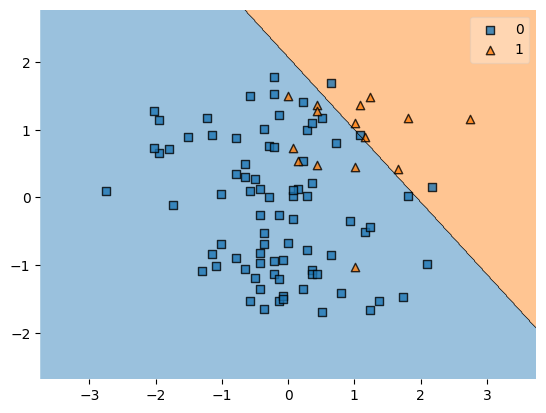

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train.values,clf=model)

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model.pkl','wb'))